In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from keras import layers
from keras import callbacks

spotify = pd.read_csv('./spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


C:\Users\nesri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum Validation Loss: 0.1996


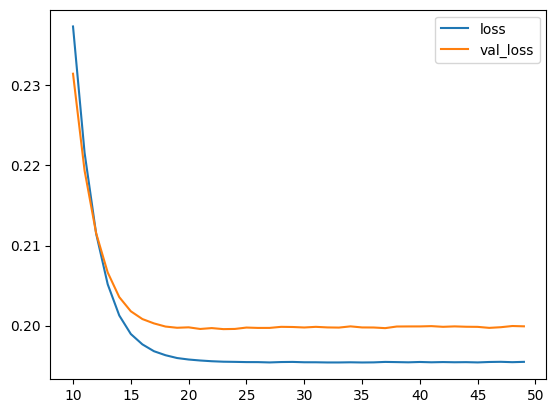

In [5]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, 
)
history_df = pd.DataFrame(history.history)
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Epoch 1/50


C:\Users\nesri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3169 - val_loss: 0.2099
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2038 - val_loss: 0.2057
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1983 - val_loss: 0.2033
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1929 - val_loss: 0.2021
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1907 - val_loss: 0.2014
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1881 - val_loss: 0.2010
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1867 - val_loss: 0.2006
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1863 - val_loss: 0.2000
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1830 - val_loss: 0.2001
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1830 - val_loss: 0.1999
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1827 - val_loss: 0.1988
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1829 - val_loss: 0.

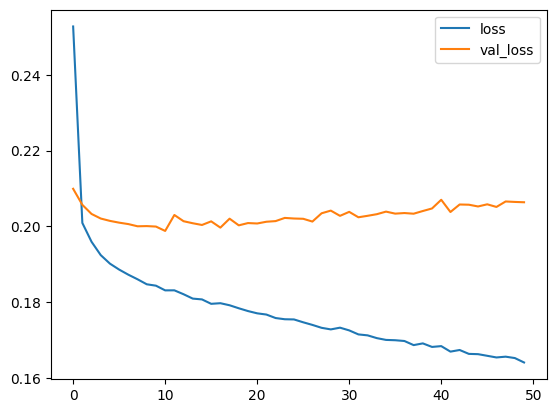

In [6]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [7]:
from keras import callbacks

early_stopping = callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

Epoch 1/50


C:\Users\nesri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2593 - val_loss: 0.2077
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2007 - val_loss: 0.2031
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1937 - val_loss: 0.2020
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1919 - val_loss: 0.2022
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1883 - val_loss: 0.1999
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1872 - val_loss: 0.1997
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1853 - val_loss: 0.1994
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1835 - val_loss: 0.1998
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1825 - val_loss: 0.1995
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1836 - val_loss: 0.1999
Minimum Validation Loss: 0.1994


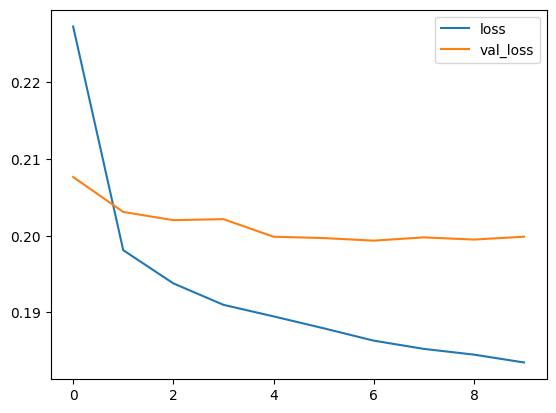

In [8]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));